# 1. Standard Scaling
 Standard Scaling is the most common scaling technique. It is used to standardize the data.  

In [9]:
# import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler,MaxAbsScaler, RobustScaler

In [2]:
# make an example dataset
df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}

# conver this data to pandas datafram
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [5]:
# import the scalar
scalar = StandardScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# Min-Max Scalar

In [7]:
# import the scalar
scalar = MinMaxScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# MaxAbs Scalar

In [8]:
# import the scalar
scalar = MaxAbsScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


# Robust Scalar

In [10]:
# import the scalar
scalar = RobustScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['data'])
df.head()
df.shape



(1000, 1)

<Axes: xlabel='data', ylabel='Count'>

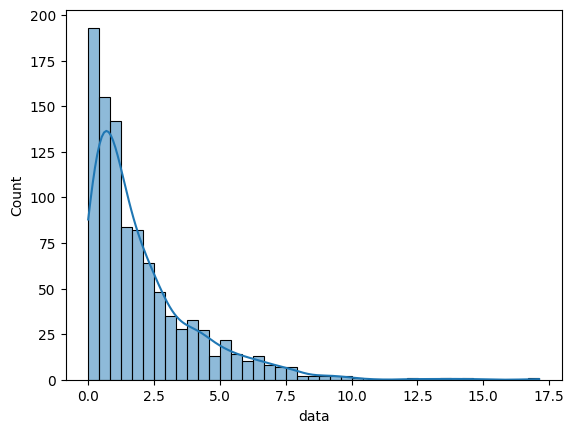

In [20]:
sns.histplot(df['data'], kde=True)

In [30]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
pt_boxcox  = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
pt_quantile = QuantileTransformer(output_distribution='normal')


# For BoxCox Data must be Positive

df['Box-Cox'] = pt_boxcox.fit_transform(df[['data']] + 1)
df['yeo-johnson'] = pt_yeo_johnson.fit_transform(df[['data']])
df['quantile'] = pt_quantile.fit_transform(df[['data']])

In [31]:
df.head()

,data,Box-Cox,yeo-johnson,quantile
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930


# Create a Histogram for all columns using sns.hist and kde=True and compare them using for loop.

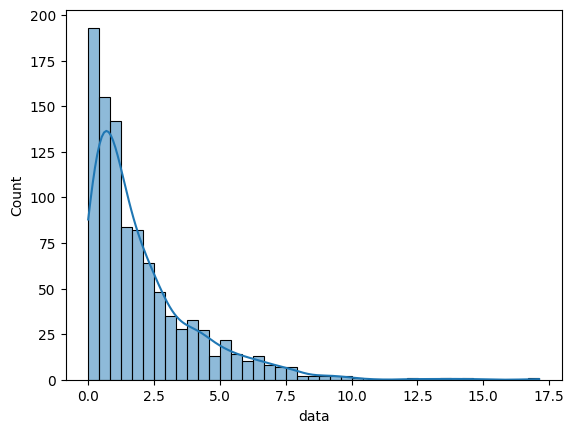

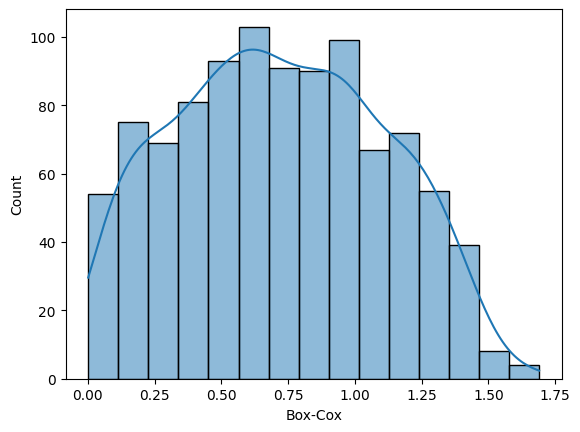

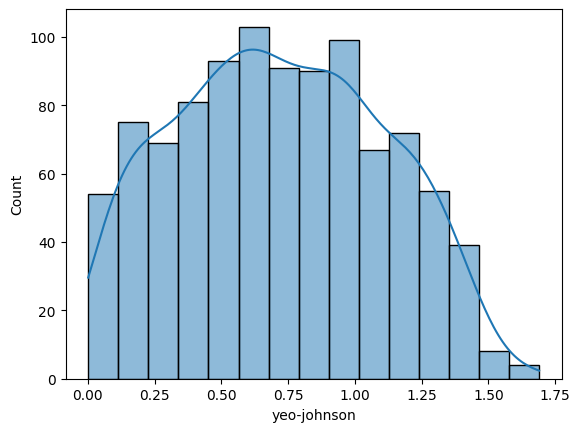

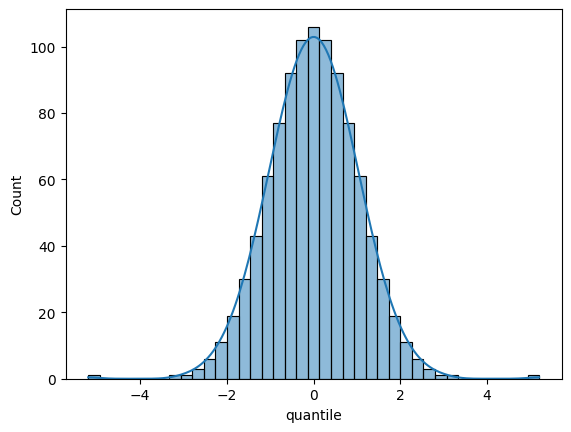

In [32]:
for i in df.columns:
    sns.histplot(df[i], kde=True)
    plt.show()

# Normalization

# L2 Normalization:
Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data. The L2 norm is calculated as the square root of the sum of the squared vector values.

In [33]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


# L1 Normalization:
Also rescales each sample (row) but with a different approach, ensuring the sum of the absolute values is 1 in each row. The L1 norm is calculated as the sum of the absolute vector values. Example:

In [34]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


1. Z-score normalization

      1. Standard Scalar
2. Min-Max normalization

      2. Min-Max Scalar
       

# Log Transformation

In [35]:
import pandas as pd
import numpy as np

# example dataset with skewed values
df = { "Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}
df = pd.DataFrame(df)
df.head()

,Values
0,1
1,5
2,10
3,20
4,50


In [36]:
df['log_values'] = np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


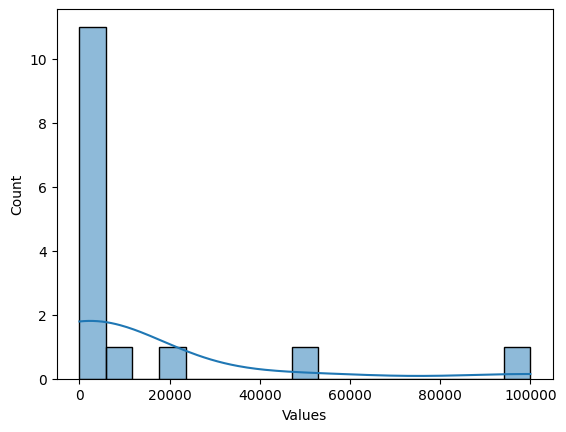

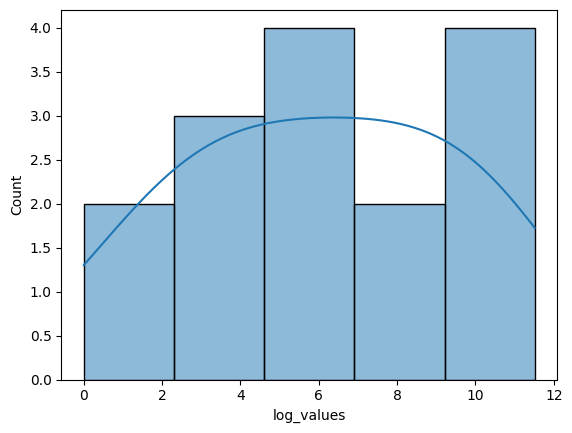

In [37]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()